In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score

In [2]:
ccdefault_all_df =pd.read_csv('/content/creditworthiness (1).csv',sep=',',encoding='latin-1')

In [3]:
ccdefault_all_df

,ID,CC_LIMIT_CAT,EDUCATION,MARITAL_STATUS,GENDER,AGE_GROUP,pay_status_1,pay_status_2,pay_status_3,pay_status_4,...,_tpm,_ppm,_RETAIL,_URBAN,_RURAL,_PREMIUM,_TREATMENT,_LTV,_CC_LIMIT,_risk_score
0,1,0,2,2,2,0,2,2,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.000000
1,2,3,2,1,2,1,-1,2,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.028792
2,3,2,2,1,2,1,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.166089
3,4,1,2,2,2,1,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.579180
4,5,1,2,2,1,0,-1,0,-1,0,...,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.382920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,5,1,2,1,1,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.141986
29996,29997,4,1,1,1,1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.034600
29997,29998,0,2,1,1,1,4,3,2,-1,...,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.686067
29998,29999,2,1,2,1,1,1,-1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.148187


In [4]:
print("number of women/men\n",ccdefault_all_df.GENDER.value_counts())
print("number of women/men with repayment delay\n",
ccdefault_all_df[ccdefault_all_df.IS_DEFAULT==1].GENDER.\
value_counts())
print("Percentage of women/men with repayment delay\n",ccdefault_all_df[ccdefault_all_df.IS_DEFAULT==1].GENDER.\
value_counts()/ccdefault_all_df.GENDER.value_counts())

number of women/men
 2    18112
1    11888
Name: GENDER, dtype: int64
number of women/men with repayment delay
 2    3763
1    2873
Name: GENDER, dtype: int64
Percentage of women/men with repayment delay
 2    0.207763
1    0.241672
Name: GENDER, dtype: float64


In [5]:
cf_matrix = metrics.confusion_matrix(ccdefault_all_df.GENDER==2,\
ccdefault_all_df.IS_DEFAULT)
print("cf_matrix\n",cf_matrix)

cf_matrix
 [[ 9015  2873]
 [14349  3763]]


<Axes: >

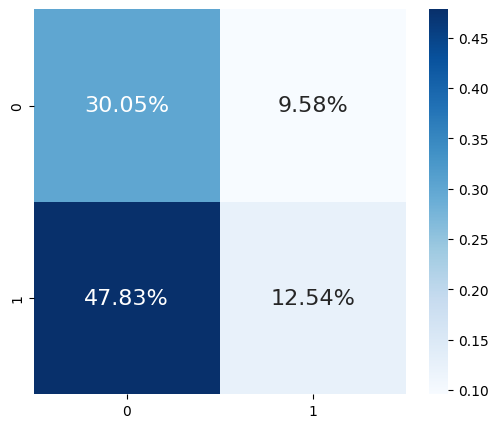

In [6]:
plt.figure(figsize=(6, 5))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,\
fmt='.2%', cmap='Blues', annot_kws={'size':16})

In [4]:
ccdefault_all_df = ccdefault_all_df[ccdefault_all_df._TREATMENT < 1]

In [5]:
y = ccdefault_all_df['IS_DEFAULT']
X = ccdefault_all_df.drop(['IS_DEFAULT'], axis=1).copy()
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=9)

In [6]:
!pip install aif360

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.1/214.1 kB 4.1 MB/s eta 0:00:00


In [7]:
import aif360
from aif360.algorithms.preprocessing import DisparateImpactRemover

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


In [8]:
train_ds = aif360.datasets.BinaryLabelDataset(df=X_train.join(y_train),\
label_names=['IS_DEFAULT'],\
protected_attribute_names=['GENDER'],
favorable_label=0, unfavorable_label=1)
test_ds = aif360.datasets.BinaryLabelDataset(df=X_test.join(y_test),\
label_names=['IS_DEFAULT'],\
protected_attribute_names=['GENDER'],
favorable_label=0, unfavorable_label=1)

In [9]:
unprivileged_groups=[{'GENDER': 2}]
privileged_groups=[{'GENDER': 1}]

In [10]:
metrics_train_ds = aif360.metrics.BinaryLabelDatasetMetric(train_ds,\
unprivileged_groups=unprivileged_groups,\
privileged_groups=privileged_groups)
metrics_test_ds = aif360.metrics.BinaryLabelDatasetMetric(test_ds,\
unprivileged_groups=unprivileged_groups,\
privileged_groups=privileged_groups)
print ("Difference in mean outcomes TEST between unprivileged and privileged groups = ",
metrics_test_ds.mean_difference())

Difference in mean outcomes TEST between unprivileged and privileged groups =  0.02220936155107256


In [15]:
print('Statistical Parity Difference (SPD):\t\t\t%.4f' %\
metrics_train_ds.statistical_parity_difference())

Statistical Parity Difference (SPD):			0.0394


In [16]:
print('Disparate Impact (DI):\t\t\t\t\t%.4f' %\
metrics_train_ds.disparate_impact())

Disparate Impact (DI):					1.0522


In [17]:
print('Smoothed Empirical Differential Fairness (SEDF):\t%.4f' %\
metrics_train_ds.smoothed_empirical_differential_fairness())

Smoothed Empirical Differential Fairness (SEDF):	0.1750


In [11]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:00


In [12]:
import tensorflow as tf
from catboost import CatBoostClassifier
rand = 9
np.random.seed(rand)
tf.random.set_seed(rand)
orig_plt_params = plt.rcParams
sns.set()
cb_mdl = CatBoostClassifier(iterations=500, learning_rate=0.5, depth=8)
fitted_cb_mdl = cb_mdl.fit(X_train, y_train, verbose=False)
y_test_cb_pred = fitted_cb_mdl .predict(X_test)

In [20]:
cf_matrix = metrics.confusion_matrix(y_test,\
y_test_cb_pred)
print("CatBoostClassifier without bias mitigation\n",cf_matrix)

CatBoostClassifier without bias mitigation
 [[5284  428]
 [ 994  589]]


<Axes: >

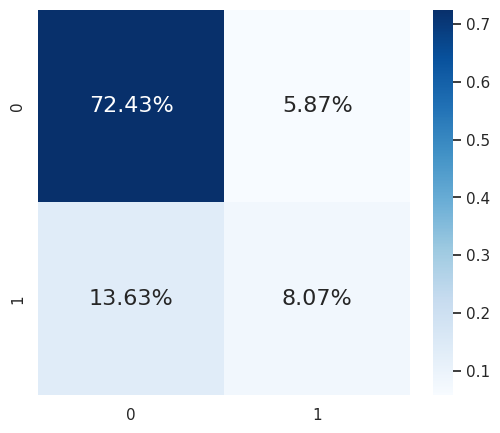

In [21]:
plt.figure(figsize=(6, 5))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,\
fmt='.2%', cmap='Blues', annot_kws={'size':16})

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_test_cb_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8050719671007539


In [67]:
series = pd.Series(y_test_cb_pred,name = 'IS_DEFAULT')

In [70]:
series

0       1
1       0
2       0
3       0
4       1
       ..
7290    1
7291    0
7292    0
7293    1
7294    0
Name: IS_DEFAULT, Length: 7295, dtype: int64

In [72]:
series.isna().any().any()

False

In [66]:
y_test

19042    1
17975    0
13030    0
22198    0
25017    1
        ..
2121     0
13252    0
11433    0
12065    0
28222    0
Name: IS_DEFAULT, Length: 7295, dtype: int64

In [ ]:
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.datasets import BinaryLabelDataset


# Create a BinaryLabelDataset for the test set
test_ds = BinaryLabelDataset(df=X_test.join(y_test_cb_pred),
                              label_names=['IS_DEFAULT'],
                              protected_attribute_names=['GENDER'],
                              favorable_label=0, unfavorable_label=1)

# Create a BinaryLabelDataset for the predicted labels
# pred_ds = BinaryLabelDataset(df=X_test.join(y_test_cb_pred), label_names=['IS_DEFAULT'],
#                               protected_attribute_names=['GENDER'],
#                               favorable_label=0, unfavorable_label=1)

# Calculate fairness metrics
metric_test = BinaryLabelDatasetMetric(test_ds, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
# metric_pred = BinaryLabelDatasetMetric(pred_ds, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

# Disparate Impact (DI)
di_test = metric_test.disparate_impact()
# di_pred = metric_pred.disparate_impact()

# Statistical Parity Difference (SPD)
spd_test = metric_test.statistical_parity_difference()
# spd_pred = metric_pred.statistical_parity_difference()

# Equalized Odds Difference (SEDF)
# seod_test = metric_test.equalized_odds_difference()
# seod_pred = metric_pred.equalized_odds_difference()

print(f"DI (Test): {di_test}, DI (Predicted): {di_test}")
print(f"SPD (Test): {spd_test}, SPD (Predicted): {di_test}")
# print(f"SEDF (Test): {seod_test}, SEDF (Predicted): {di_test}")

In [13]:
# class_weights = [0.8,0.2]
test_pred_ds = test_ds.copy(deepcopy=True)
cb_mdl = CatBoostClassifier(iterations=500, learning_rate=0.5, depth=8,class_weights = [0.9,0.1])
fitted_cb_mdl = cb_mdl.fit(X_train, y_train, verbose=False)
y_test_cb_pred = fitted_cb_mdl .predict(X_test)
cf_matrix = metrics.confusion_matrix(y_test,\
y_test_cb_pred)
print("POSW CatBoostClassifier\n",cf_matrix)

POSW CatBoostClassifier
 [[5518  194]
 [1206  377]]


<Axes: >

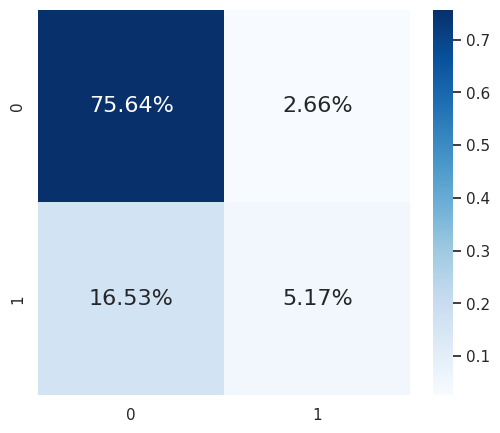

In [23]:
plt.figure(figsize=(6, 5))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,\
fmt='.2%', cmap='Blues', annot_kws={'size':16})

In [29]:
accuracy = accuracy_score(y_test, y_test_cb_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8080877313228239


In [ ]:
!pip install fairlearn

In [14]:
from aif360.algorithms.preprocessing.reweighing import Reweighing
reweigher = Reweighing(unprivileged_groups=unprivileged_groups,\
privileged_groups=privileged_groups)
reweigher.fit(train_ds)
train_rw_ds = reweigher.transform(train_ds)

In [15]:
from aif360.metrics import BinaryLabelDatasetMetric
metrics_train_rw_ds = BinaryLabelDatasetMetric(train_rw_ds,\
unprivileged_groups=unprivileged_groups,\
privileged_groups=privileged_groups)
print('Reweigher (REW) Statistical Parity Difference (SPD):\t\t\t%.4f' %\
metrics_train_rw_ds.statistical_parity_difference())
print('REW Disparate Impact (DI):\t\t\t\t\t%.4f' %\
metrics_train_rw_ds.disparate_impact())
print('REW Smoothed Empirical Differential Fairness (SEDF):\t%.4f' %\
metrics_train_rw_ds.smoothed_empirical_differential_fairness())
np.abs(train_ds.instance_weights.mean() - train_rw_ds.instance_weights.mean())

Reweigher (REW) Statistical Parity Difference (SPD):			0.0000
REW Disparate Impact (DI):					1.0000
REW Smoothed Empirical Differential Fairness (SEDF):	0.0001


2.220446049250313e-16

In [16]:
cb_mdl = CatBoostClassifier(iterations=500, learning_rate=0.5, depth=8)
fitted_cb_mdl = cb_mdl.fit(X_train, y_train, verbose=False,
sample_weight=train_rw_ds.instance_weights)
y_test_cb_pred = fitted_cb_mdl .predict(X_test)
cf_matrix = metrics.confusion_matrix(y_test,\
y_test_cb_pred)

<Axes: >

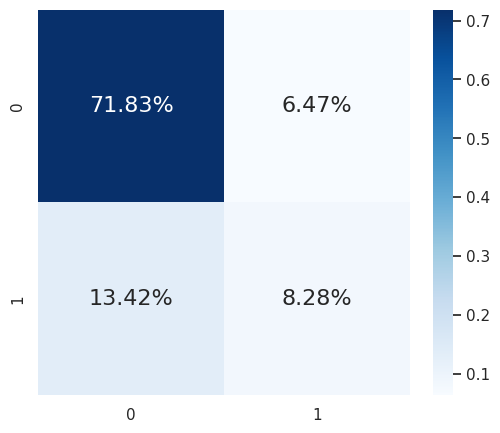

In [17]:
plt.figure(figsize=(6, 5))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,\
fmt='.2%', cmap='Blues', annot_kws={'size':16})

In [18]:
from aif360.algorithms.inprocessing import PrejudiceRemover
log_pr_mdl = PrejudiceRemover(eta=1.0, sensitive_attr='GENDER',class_attr='IS_DEFAULT')
log_pr_mdl.fit(train_ds)
train_pred_pr_ds = log_pr_mdl.predict(train_ds)
test_pred_pr_ds = log_pr_mdl.predict(test_ds)

In [19]:
metrics_train_pr_ds = BinaryLabelDatasetMetric(train_pred_pr_ds,\
unprivileged_groups=unprivileged_groups,\
privileged_groups=privileged_groups)
print('Reweigher (REW) Statistical Parity Difference (SPD):\t\t\t%.4f' %\
metrics_train_pr_ds.statistical_parity_difference())
print('REW Disparate Impact (DI):\t\t\t\t\t%.4f' %\
metrics_train_pr_ds.disparate_impact())
print('REW Smoothed Empirical Differential Fairness (SEDF):\t%.4f' %\
metrics_train_pr_ds.smoothed_empirical_differential_fairness())

Reweigher (REW) Statistical Parity Difference (SPD):			-0.0406
REW Disparate Impact (DI):					0.5208
REW Smoothed Empirical Differential Fairness (SEDF):	0.6522


In [20]:
from catboost import CatBoostClassifier
cb_mdl = CatBoostClassifier(iterations=500, learning_rate=0.5, depth=8)
fitted_cb_mdl = cb_mdl.fit(X_train, y_train, verbose=False)
y_test_cb_pred = fitted_cb_mdl .predict(X_test)

In [21]:
from aif360.datasets import BinaryLabelDataset
test_ds = BinaryLabelDataset(df=X_test.join(y_test),\
label_names=['IS_DEFAULT'],\
protected_attribute_names=['GENDER'],
favorable_label=0, unfavorable_label=1)
X_posw = X_test.copy()
X_posw['IS_DEFAULT'] = y_test_cb_pred
y_test_cb_pred = BinaryLabelDataset(df=X_posw,\
label_names=['IS_DEFAULT'],\
protected_attribute_names=['GENDER'],
favorable_label=0, unfavorable_label=1)

In [22]:
from aif360.algorithms.postprocessing import EqOddsPostprocessing

epp = EqOddsPostprocessing(privileged_groups=privileged_groups,\
unprivileged_groups=unprivileged_groups,\
seed=rand)

In [23]:
epp = epp.fit(test_ds, y_test_cb_pred)
test_pred_epp_ds = epp.predict(y_test_cb_pred)

In [24]:
metrics_test_dir_ds = BinaryLabelDatasetMetric(test_pred_epp_ds,\
unprivileged_groups=unprivileged_groups,\
privileged_groups=privileged_groups)
print('EPP Statistical Parity Difference (SPD):\t\t\t%.4f' %\
metrics_test_dir_ds.statistical_parity_difference())
print('EPP Disparate Impact (DI):\t\t\t\t\t%.4f' %\
metrics_test_dir_ds.disparate_impact())
print('EPP Smoothed Empirical Differential Fairness (SEDF):\t%.4f' %\
metrics_test_dir_ds.smoothed_empirical_differential_fairness())
print ("EPP Difference in mean outcomes TEST between unprivileged and privileged groups in percent" ,round(metrics_test_dir_ds.mean_difference()*100,2))

EPP Statistical Parity Difference (SPD):			0.0062
EPP Disparate Impact (DI):					1.0075
EPP Smoothed Empirical Differential Fairness (SEDF):	0.0396
EPP Difference in mean outcomes TEST between unprivileged and privileged groups in percent 0.62
